# Sprint3 線形回帰

>## ScratchLinearRegressionクラスの実装
---

In [308]:
import numpy as np


class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    theta : ndarray
      最急降下法パラメータ
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, theta, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
#         self.theta = np.array([[0, 0]])   # Θの初期化
        self.theta = theta  # 訓練用
        self.theta_val = theta  # 検証用
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
        # メイン処理
 
        # Xの第1成分を1として、引数のXと結合させる
        X = np.c_[np.ones(X.shape[0]),X]
        if X_val is not None:
            X_val = np.c_[np.ones(X_val.shape[0]),X_val]
    
        for i in range(self.iter):
            
            # 問題1（仮定関数の計算）
            y_hypothesis = self._linear_hypothesis(X)
            
            # 問題2（最急降下法によるパラメータの更新値計算）
            self._gradient_descent(X, y_hypothesis-y)
            
            # 問題7（学習曲線のプロット）のグラフ描画時（問題5（損失関数）で作成した関数を使用）
            # 損失値を保持
            self.loss[i] = self._loss_func(y_hypothesis, y)
            
            # 検証データがある場合は、欠損値のデータを算出する
            if X_val is not None:
                y_val_hypothesis = self._linear_hypothesis(X_val, isTrain = False)
                self._gradient_descent(X_val, y_val_hypothesis-y_val, isTrain = False)
                self.val_loss[i] = self._loss_func(y_val_hypothesis, y_val)
    
    
    # 問題1
    def _linear_hypothesis(self, X, isTrain = True):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        isTrain : bool
            訓練データ用フラグ
        Returns
        -------
        y : 次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        
        if isTrain :   #訓練の場合
            y = self.theta @ X.T
        else:
            y = self.theta_val @ X.T
        
        return y

    
    # 問題2
    def _gradient_descent(self, X, error, isTrain = True):
        """
        最急降下法を使って最適化する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        error : 次の形のndarray, shape (n_samples, n_features)
          予測値と正解値の誤差(y_pred - y)
        isTrain : bool
            訓練データ用フラグ
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          最急降下法を実施した結果
        """

        m, n = X.shape
        
        res1 = error @ X
        res2 = res1/m * self.lr

        # Θを更新
        if isTrain :  #訓練の場合
            self.theta = self.theta - res2
        else:
            self.theta_val = self.theta_val - res2
    
        
    # 問題3            
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果(仮定関数 hθ(x) の出力)
        """
        X = np.c_[np.ones(X.shape[0]),X]
        
        # predictは一般的に訓練データを使うため、_linear_hypothesisメソッドの引数は
        # isTrain = Trueとする。
        return self._linear_hypothesis(X)
    
    # 問題4
    def _mse(self, y_pred, y):  # 必要に応じて引数を追加して下さい
        """
        平均二乗誤差の計算
        """
        return ((y - y_pred) ** 2).mean()

    # 問題5
    def _loss_func(self, y_pred, y):  # 必要に応じて引数を追加して下さい
        """
        損失関数
        """
        return ((y - y_pred) ** 2).mean()/2
        

## 【問題1】仮定関数
---
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
hθ(x)=θ0x0+θ1x1+...+θjxj+...+θnxn.(x0=1)
$$

x: 特徴量ベクトル  
θ: パラメータベクトル  
n: 特徴量の数  
xj: j番目の特徴量  
θj: j番目のパラメータ（重み）  

特徴量の数nは任意の値に対応できる実装にしてください。

なお、ベクトル形式で表すと以下のようになります。
$$
hθ(x)=θT⋅x.
$$

**雛形**
クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

In [309]:
#####トイデータ
X = np.arange(10)

# y = ax1 + b
a = 2
b = 3
theta = np.array([[b],[a]])

X_ = np.c_[np.ones(X.shape[0]),X]
y = X_ @ theta 
        
print(y)


[[ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


## 【問題2】最急降下法
---
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。
$$
θj:=θj−α1mm∑i=1[(hθ(x(i))−y(i))x(i)j]
$$
α: 学習率  
i: サンプルのインデックス  
j: 特徴量のインデックス  

雛形

ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。

In [310]:
# クラスのインスタンス生成
num_iter = 10   #イテレーション数（学習回数）
lr = 0.05  #学習率
theta = np.array([[1, 2]])
slr = ScratchLinearRegression(num_iter, lr, theta, None, None)

x = np.linspace(1,6,5)
X = np.c_[np.ones(5),x]#入力データX

y = 2*x + 1#適当な真のモデル
y_pred = X @ theta.T

error = y_pred - y#入力データerror
print('y_pred : \n', y_pred)
print('error : \n', error)

new_theta = slr._gradient_descent(X, error)

print('theta : \n', slr.theta)


y_pred : 
 [[ 3. ]
 [ 5.5]
 [ 8. ]
 [10.5]
 [13. ]]
error : 
 [[  0.   -2.5  -5.   -7.5 -10. ]
 [  2.5   0.   -2.5  -5.   -7.5]
 [  5.    2.5   0.   -2.5  -5. ]
 [  7.5   5.    2.5   0.   -2.5]
 [ 10.    7.5   5.    2.5   0. ]]
theta : 
 [[1.25   3.1875]
 [1.125  2.75  ]
 [1.     2.3125]
 [0.875  1.875 ]
 [0.75   1.4375]]


## 【問題3】推定
---
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 $$hθ(x)$$
の出力が推定結果です。

## 【問題4】平均二乗誤差
---
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。
$$
L(θ)=1mm∑i=1(hθ(x(i))−y(i))2.
$$
m : 入力されるデータの数

hθ() : 仮定関数

x(i) : i番目のサンプルの特徴量ベクトル

y(i) : i番目のサンプルの正解値

なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

In [311]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """

    return ((y - y_pred) ** 2).mean()

In [312]:
##### トイデータ
import numpy as np
y_pred = np.array([0,1,2,3,4,5])
y = np.array([1,3,5,7,9,11])

print(MSE(y_pred, y))


15.166666666666666


## 【問題5】目的関数
---
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） $$J(θ)$$

は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$
m : 入力されるデータの数

hθ() : 仮定関数

x(i) : i番目のサンプルの特徴量ベクトル

y(i) : i番目のサンプルの正解値

In [313]:
##### トイデータ
import numpy as np
y_pred = np.array([0,1,2,3,4,5])
y = np.array([1,3,5,7,9,11])

print(((y - y_pred) ** 2).mean()/2)


7.583333333333333


## 【問題6】学習と推定
---
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

>## GrLivAreaデータ

In [314]:
import pandas as pd

df = pd.read_csv("../train.csv")
# X = df[['GrLivArea', 'YearBuilt']].values
X = df[['GrLivArea']].values
y = df['SalePrice'].values

X

array([[1710],
       [1262],
       [1786],
       ...,
       [2340],
       [1078],
       [1256]], dtype=int64)

>### scikit-learnによる実装

In [315]:
#線形回帰モデル
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

print("Intercept:", model.intercept_)
print("Coefficients: ", model.coef_)
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))


Intercept: 180586.22896281802
Coefficients:  [56643.14720007]
MSE: 3728458191.95


>### Scratch実装コード

In [316]:
# クラスのインスタンス生成
num_iter = 100   #イテレーション数（学習回数）
lr = 0.05  #学習率
theta = np.array([[0, 0]])
scratch_lr = ScratchLinearRegression(num_iter, lr, theta, None, None)
scratch_lr.fit(X_train_std, y_train, X_test_std, y_test)
# scratch_lr.fit(X_train_std, y_train)
s_y_pred = scratch_lr.predict(X_test_std)

print("Intercept:", scratch_lr.theta[:,0])
print("Coefficients: ", scratch_lr.theta[:,1])
print('MSE: %.2f' % MSE(s_y_pred, y_test))

Intercept: [179517.06291745]
Coefficients:  [56307.78979194]
MSE: 3734500670.93


>### sicit-learnによる学習結果とScratchの結果をプロット

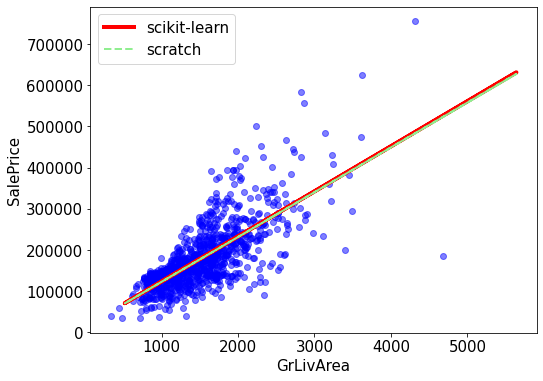

In [317]:
# 可視化
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(8,6))

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_train, y_train, color = 'blue', alpha=0.5) 
plt.plot(X_test, y_pred, linewidth=4, color = 'red', label = 'scikit-learn')    # sicit-learn
plt.plot(X_test, s_y_pred.T, linestyle='--', linewidth=2, color = 'lightgreen', label = 'scratch')   # スクラッチ
plt.legend()
plt.show()

>## YearBuiltデータ

In [318]:
import pandas as pd

df = pd.read_csv("../train.csv")
# X = df[['GrLivArea', 'YearBuilt']].values
X = df[['YearBuilt']].values
y = df['SalePrice'].values

X

array([[2003],
       [1976],
       [2001],
       ...,
       [1941],
       [1950],
       [1965]], dtype=int64)

>### scikit-learnによる実装

In [319]:
#線形回帰モデル
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

print("Intercept:", model.intercept_)
print("Coefficients: ", model.coef_)
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))


Intercept: 180586.22896281796
Coefficients:  [40097.79768644]
MSE: 4800715717.79


>### Scratch実装コード

In [320]:
# クラスのインスタンス生成
num_iter = 100   #イテレーション数（学習回数）
lr = 0.05  #学習率
theta = np.array([[0, 0]])
scratch_lr = ScratchLinearRegression(num_iter, lr, theta, None, None)
scratch_lr.fit(X_train_std, y_train, X_test_std, y_test)
# scratch_lr.fit(X_train_std, y_train)
s_y_pred = scratch_lr.predict(X_test_std)

print("Intercept:", scratch_lr.theta[:,0])
print("Coefficients: ", scratch_lr.theta[:,1])
print('MSE: %.2f' % MSE(s_y_pred, y_test))

Intercept: [179517.06291745]
Coefficients:  [39860.39750356]
MSE: 4803553608.34


>### sicit-learnによる学習結果とScratchの結果をプロット

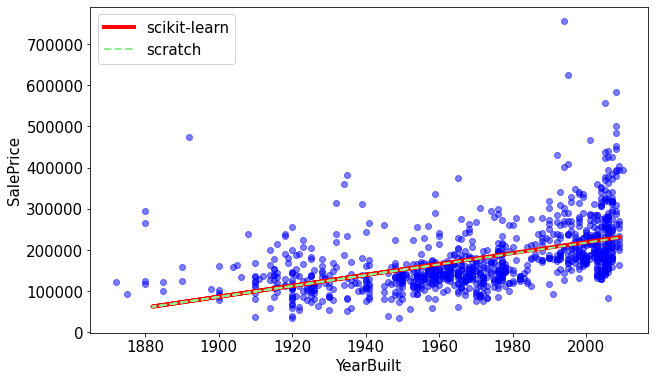

In [321]:
# 可視化
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(10,6))

plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(X_train, y_train, color = 'blue', alpha=0.5) 
plt.plot(X_test, y_pred, linewidth=4, color = 'red', label = 'scikit-learn')    # sicit-learn
plt.plot(X_test, s_y_pred.T, linestyle='--', linewidth=2, color = 'lightgreen', label = 'scratch')   # スクラッチ
plt.legend()
plt.show()

## まとめ
---
sicit-learnとScratchの実装結果を比べると、ほぼ同じ結果となった。

|  | scikit-learn | Scratch |
| - | - | - |
| Intercept | 180586.22896281802 | 179517.06291745 |
| Coefficients | 56643.14720007 | 56307.78979194 |
| MSE | 3728458191.95 | 3734500670.93 |

## 【問題7】学習曲線のプロット
---
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

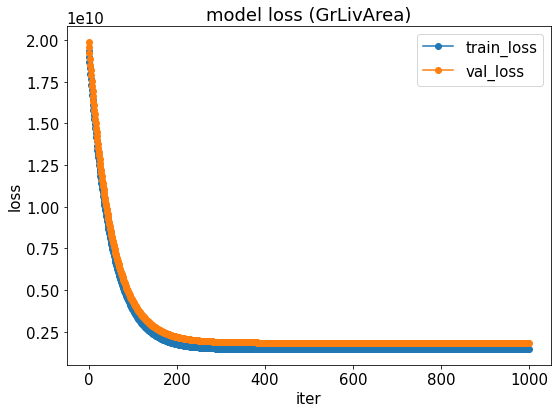

In [322]:
import pandas as pd

df = pd.read_csv("../train.csv")
# X = df[['GrLivArea', 'YearBuilt']].values
X = df[['GrLivArea']].values
y = df['SalePrice'].values

#線形回帰モデル
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# クラスのインスタンス生成
num_iter = 1000   #イテレーション数（学習回数）
lr = 0.01  #学習率
theta = np.array([[0, 0]])
scratch_lr = ScratchLinearRegression(num_iter, lr, theta, None, None)
scratch_lr.fit(X_train_std, y_train, X_test_std, y_test)
s_y_pred = scratch_lr.predict(X_test_std)


# 損失値をプロット
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(8,6))

plt.title('model loss (GrLivArea)')
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(range(scratch_lr.iter), scratch_lr.loss.T, linestyle='-', marker='o', label = 'train_loss')
plt.plot(range(scratch_lr.iter), scratch_lr.val_loss.T, linestyle='-', marker='o', label = 'val_loss')

plt.legend()
plt.tight_layout()
plt.show()

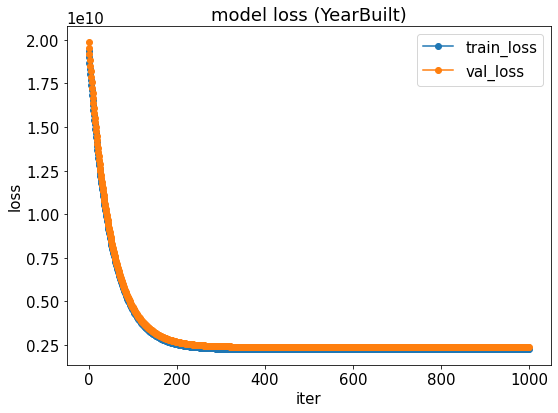

In [323]:
import pandas as pd

df = pd.read_csv("../train.csv")
# X = df[['GrLivArea', 'YearBuilt']].values
X = df[['YearBuilt']].values
y = df['SalePrice'].values

#線形回帰モデル
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# クラスのインスタンス生成
num_iter = 1000   #イテレーション数（学習回数）
lr = 0.01  #学習率
theta = np.array([[0, 0]])
scratch_lr = ScratchLinearRegression(num_iter, lr, theta, None, None)
scratch_lr.fit(X_train_std, y_train, X_test_std, y_test)
s_y_pred = scratch_lr.predict(X_test_std)


# 損失値をプロット
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(8,6))

plt.title('model loss (YearBuilt)')
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(range(scratch_lr.iter), scratch_lr.loss.T, linestyle='-', marker='o', label = 'train_loss')
plt.plot(range(scratch_lr.iter), scratch_lr.val_loss.T, linestyle='-', marker='o', label = 'val_loss')

plt.legend()
plt.tight_layout()
plt.show()